In [1]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv("/content/List of Orders.csv")
df2=pd.read_csv("/content/Order Details.csv")

In [3]:
df1.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal
3,B-25604,03-04-2018,Divsha,Rajasthan,Jaipur
4,B-25605,05-04-2018,Kasheen,West Bengal,Kolkata


In [4]:
df1.shape

(500, 5)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [6]:
df1.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [7]:
df2.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,168.0,-111.0,2,Electronics,Phones


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [9]:
df2.isnull().sum()

Order ID        0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

###Feature Engineering

In [10]:
import random

In [11]:
df1['CustID'] = random.sample(range(1500), df1.shape[0])

In [12]:
df=df1.merge(df2)

In [13]:
df.head()

,Order ID,Order Date,CustomerName,State,City,CustID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,932,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,932,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,932,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,932,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,166,168.0,-111.0,2,Electronics,Phones


In [14]:
df.isnull().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
CustID          0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [15]:
df.shape

(1500, 11)

In [16]:
import calendar
import datetime as dt

In [17]:
df.drop('CustomerName',axis=1,inplace=True)

In [18]:
df.drop('Profit',axis=1,inplace=True)

In [19]:
df['Revenue']=df['Quantity']*df['Amount']

In [20]:
df[['Day','Month','Year']]=df['Order Date'].str.split("-",expand=True)

In [21]:
df['Month'].unique()

array(['04', '05', '06', '07', '08', '09', '10', '11', '12', '01', '02',
       '03'], dtype=object)

In [22]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [23]:
df['Month'] = df['Month'].apply(lambda x: calendar.month_name[int(x)])
df['Week of the Year'] = df['Order Date'].dt.isocalendar().week

In [24]:
df['Day of Week'] = df['Order Date'].dt.day_name()

In [25]:
df.reset_index(inplace=True)

In [26]:
a=df['Sub-Category'].unique()

In [27]:
len(a)
b=random.sample(range(20),len(a))

In [28]:
dict1 = {}
for key in a:
    for value in b:
        dict1[key] = value
        b.remove(value)
        break

In [29]:
catID=[]
for i in df['Sub-Category']:
  for k,v in dict1.items():
      if (i==k):
        catID.append(v)

In [30]:
df['ProductID']=catID

C:\Users\Dell\Desktop\mini project-PATH

In [180]:
df.to_csv(r'C:\Users\Dell\Desktop\mini project\clean_data.csv',header=True)

In [181]:
df.to_csv('clean_data.csv')

In [184]:
from google.colab import files
files.download("clean_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###State sales

In [31]:
df.describe()

,index,CustID,Amount,Quantity,Revenue,Week of the Year,ProductID
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,749.500000,725.437333,287.668000,3.743333,1431.246667,24.388667,10.774667
std,433.157015,436.478236,461.050488,2.184942,3694.882925,15.036811,5.788341
min,0.000000,2.000000,4.000000,1.000000,4.000000,1.000000,2.000000
25%,374.750000,342.000000,45.000000,2.000000,120.000000,11.000000,5.000000
50%,749.500000,700.000000,118.000000,3.000000,415.500000,25.000000,11.000000
75%,1124.250000,1101.500000,322.000000,5.000000,1286.250000,37.000000,16.000000
max,1499.000000,1499.000000,5729.000000,14.000000,80206.000000,52.000000,19.000000


In [32]:
state=df.groupby('State')['Order ID'].nunique().sort_values(ascending=False)

In [33]:
state

State
Madhya Pradesh       101
Maharashtra           90
Rajasthan             32
Gujarat               27
Punjab                25
West Bengal           22
Delhi                 22
Uttar Pradesh         22
Karnataka             21
Kerala                16
Bihar                 16
Nagaland              15
Andhra Pradesh        15
Jammu and Kashmir     14
Himachal Pradesh      14
Haryana               14
Goa                   14
Sikkim                12
Tamil Nadu             8
Name: Order ID, dtype: int64

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

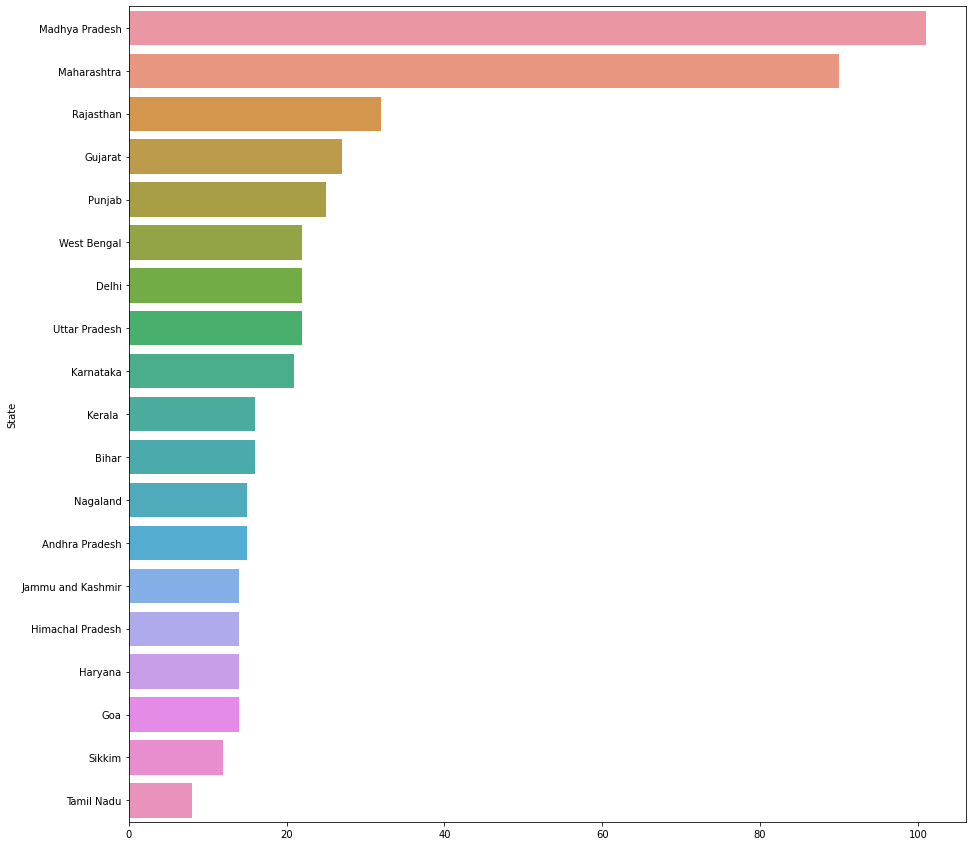

In [35]:
plt.figure(figsize=(15,15))
sns.barplot(y=state.index,x=state.values)

More number of orders are from Madhya Pradesh and the least number of orders are from Tamil Nadu. Also the southern states of kerala,goa,andhra pradesh seem to have fewer number of orders.

In [36]:
state_sales=df.groupby('State')['Revenue'].sum().sort_values(ascending=False)

In [37]:
state_sales

State
Madhya Pradesh       569685.0
Maharashtra          467660.0
Uttar Pradesh        150032.0
Gujarat              100292.0
Delhi                 97071.0
Rajasthan             94050.0
Andhra Pradesh        82897.0
Punjab                77591.0
Karnataka             66231.0
West Bengal           58035.0
Nagaland              57985.0
Haryana               54891.0
Bihar                 54082.0
Jammu and Kashmir     53201.0
Kerala                46158.0
Himachal Pradesh      39850.0
Tamil Nadu            29195.0
Goa                   27919.0
Sikkim                20045.0
Name: Revenue, dtype: float64

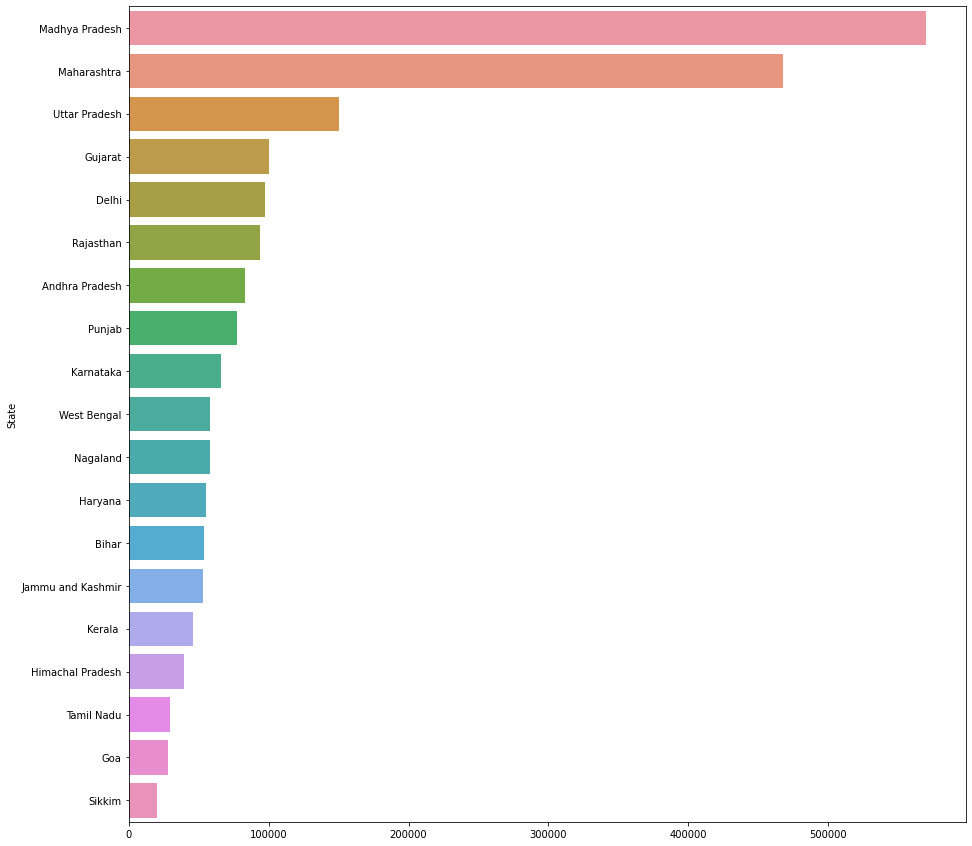

In [38]:
plt.figure(figsize=(15,15))
sns.barplot(y=state_sales.index,x=state_sales.values)

Sikkim has the least sales. As expected Madhya Pradesh has the highest sales followed by Maharashtra and Uttar Pradhesh. It is noticeable that the Central - Northern states has the highest number of orders and sales and the north-eastren and southern states have very less number of orders comparably.

In [39]:
df.columns

Index(['index', 'Order ID', 'Order Date', 'State', 'City', 'CustID', 'Amount',
       'Quantity', 'Category', 'Sub-Category', 'Revenue', 'Day', 'Month',
       'Year', 'Week of the Year', 'Day of Week', 'ProductID'],
      dtype='object')

###Product Sales

In [40]:
category = df.groupby('Sub-Category')['Quantity'].sum().reset_index()

In [41]:
tup1=[tuple(i) for i in category.values]
dict2=dict(tup1)

In [42]:
from wordcloud import WordCloud

In [43]:
wc=WordCloud().generate_from_frequencies(dict2)

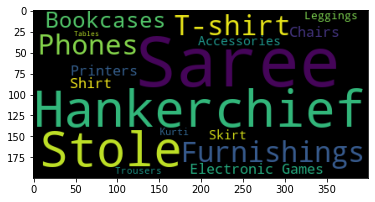

In [44]:
plt.imshow(wc)

It can be seenn that sarees,stoles and handkerchiefs are the most ordered products.

In [45]:
category_sales = df.groupby('Sub-Category')['Revenue'].sum().reset_index()

In [46]:
tup2=[tuple(i) for i in category_sales.values]
dict3=dict(tup2)

In [47]:
wc1=WordCloud().generate_from_frequencies(dict3)

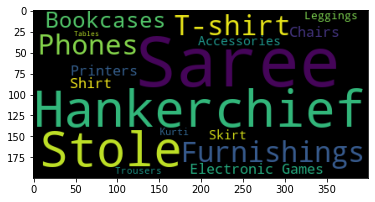

In [48]:
plt.imshow(wc)

It can be seen that the furniture stuffs has brought more sales.

In [49]:
cat = df.groupby('Category')['Quantity'].sum()

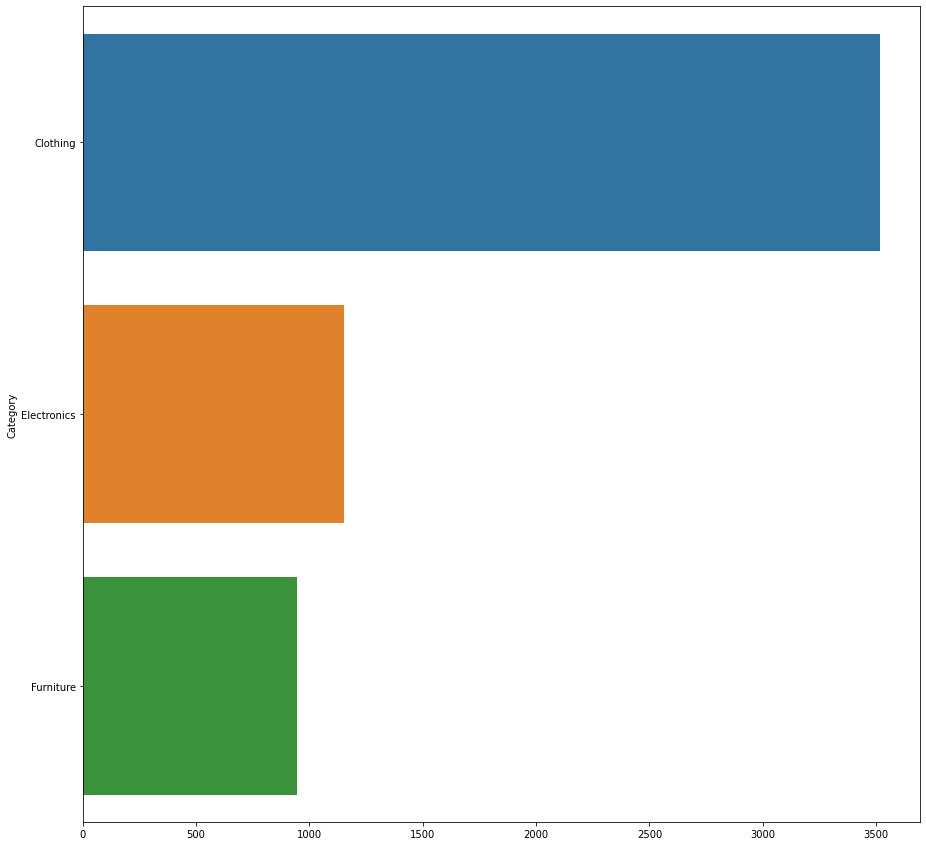

In [50]:
plt.figure(figsize=(15,15))
sns.barplot(y=cat.index,x=cat.values)

It is evident that Clothing has the more orders.

In [51]:
cat_sale = df.groupby('Category')['Revenue'].sum()

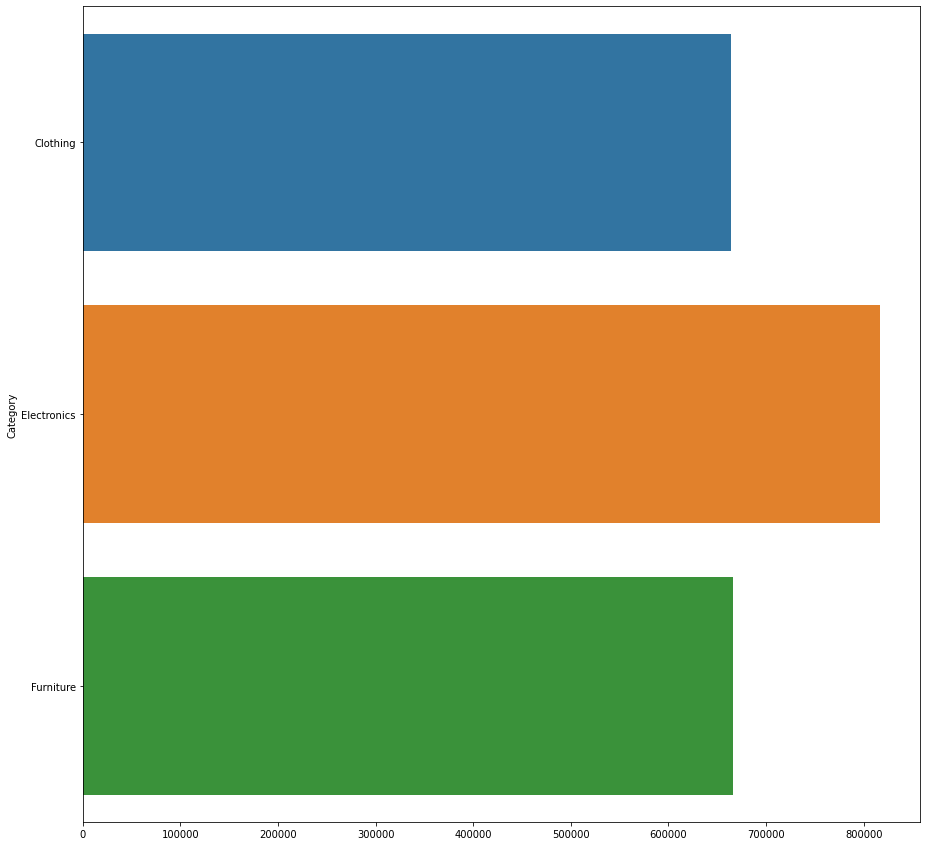

In [52]:
plt.figure(figsize=(15,15))
sns.barplot(y=cat_sale.index,x=cat_sale.values)

Though the clothing category has has more number of orders , The highes sale is from Electronic goods.

###Monthly Sales.

In [53]:
monthly = df.groupby('Month')['Quantity'].sum()
monthly_sales=df.groupby('Month')['Revenue'].sum()

Text(0.5, 1.0, 'Monthly Orders')

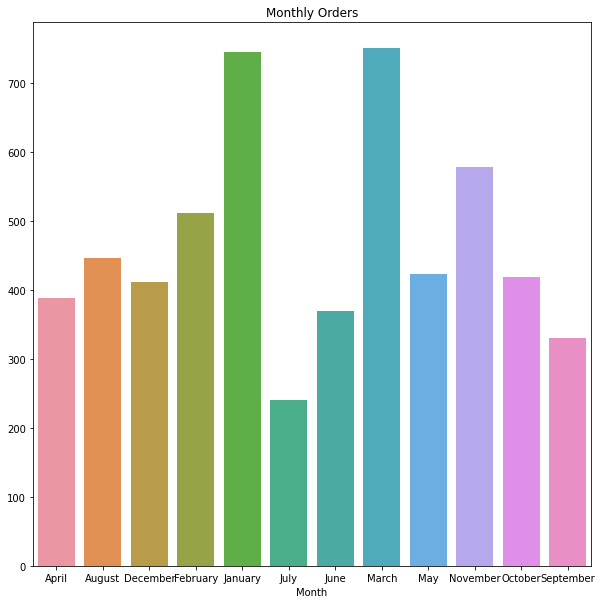

In [54]:
plt.figure(figsize=(10,10))
sns.barplot(x=monthly.index,y=monthly.values)
plt.title("Monthly Orders")

Text(0.5, 1.0, 'Monthly Sales')

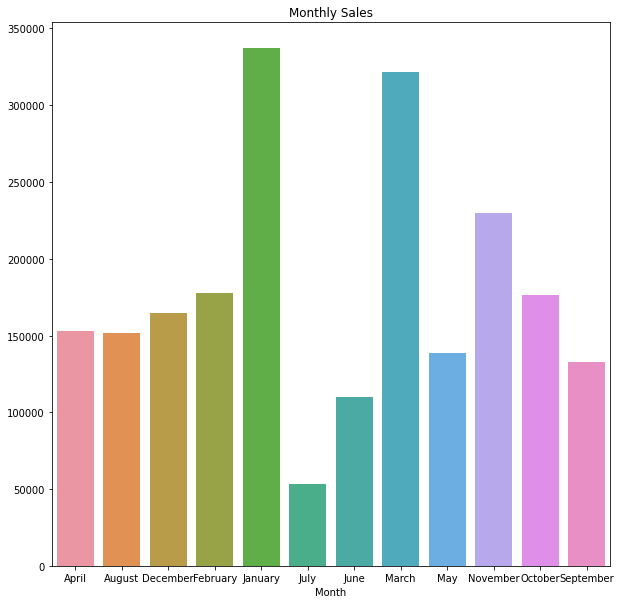

In [55]:
plt.figure(figsize=(10,10))
sns.barplot(x=monthly_sales.index,y=monthly_sales.values)
plt.title("Monthly Sales")


High number of Orders and Sales and have been observed in the months of January and MArch.

In [56]:
df['Year'].unique()

array(['2018', '2019'], dtype=object)

In [57]:
df18=df[df['Year']=='2018']

In [58]:
df19=df[df['Year']=='2019']

In [59]:
sale18=df18.groupby('Month')['Quantity'].sum()
sale19=df19.groupby('Month')['Quantity'].sum()

Text(0.5, 1.0, '2018 sales')

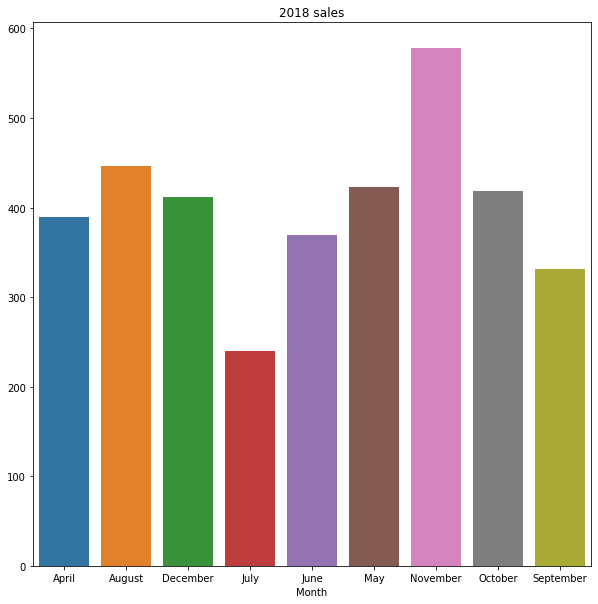

In [60]:
plt.figure(figsize=(10,10))
sns.barplot(x=sale18.index,y=sale18.values)
plt.title("2018 sales")

Text(0.5, 1.0, '2019 sales')

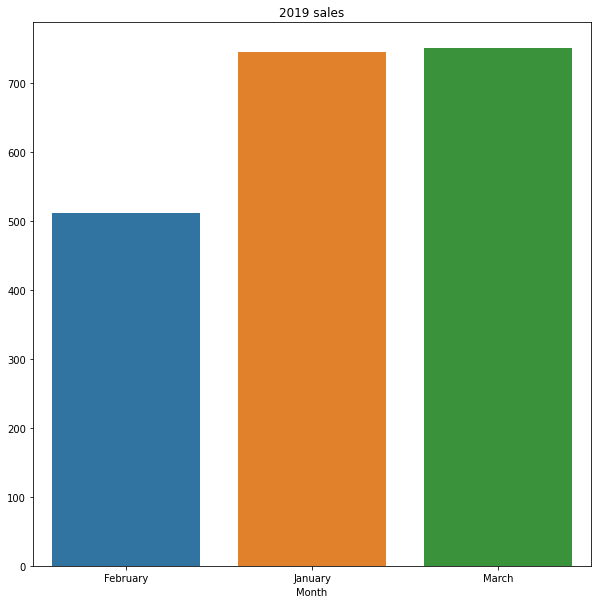

In [61]:
plt.figure(figsize=(10,10))
sns.barplot(x=sale19.index,y=sale19.values)
plt.title("2019 sales")

###Daily Stats

In [62]:
day_orders = df.groupby("Day of Week")['Quantity'].sum()

In [63]:
day_orders

Day of Week
Friday        845
Monday        796
Saturday      712
Sunday        858
Thursday     1068
Tuesday       732
Wednesday     604
Name: Quantity, dtype: int64

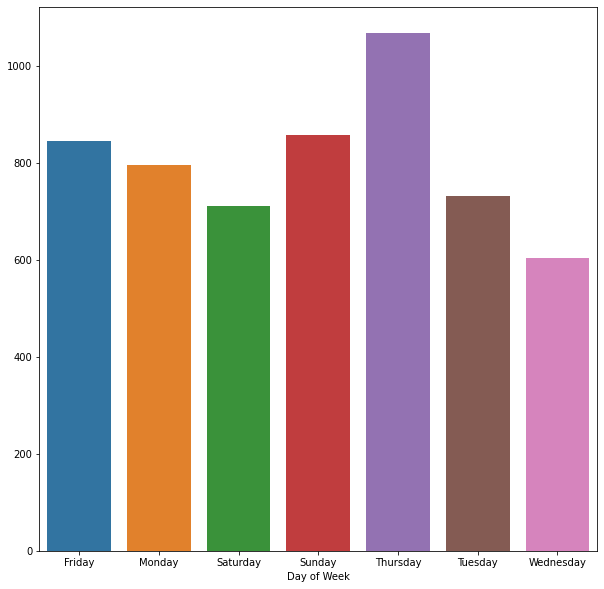

In [64]:
plt.figure(figsize=(10,10))
sns.barplot(x=day_orders.index,y=day_orders.values)

Thursday has the highest number of orders placed.

In [65]:
day_sales = df.groupby("Day of Week")['Revenue'].sum()

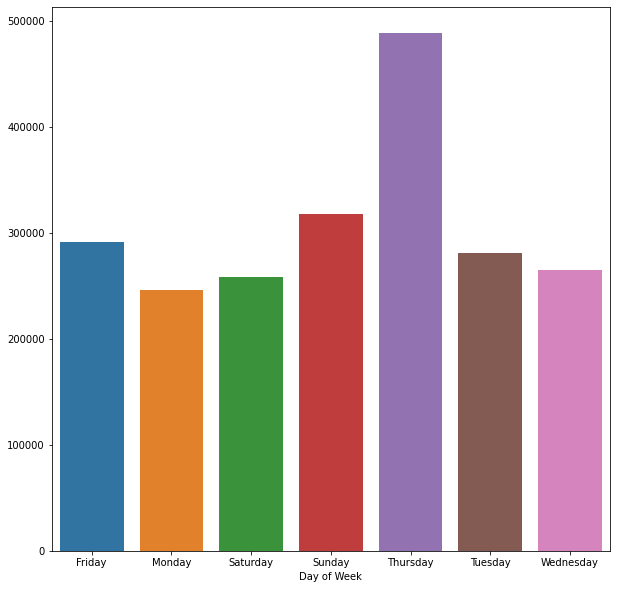

In [66]:
plt.figure(figsize=(10,10))
sns.barplot(x=day_sales.index,y=day_sales.values)

([<matplotlib.patches.Wedge at 0x7f565f0d3050>,
 [Text(1.0018525231423523, 0.4541932648920529, 'Friday'),
  Text(0.38748937438868053, 1.029491129022426, 'Monday'),
  Text(-0.4060271796297766, 1.0223218325957288, 'Saturday'),
  Text(-1.0337142242331032, 0.3760783197927714, 'Sunday'),
  Text(-0.7415624510679862, -0.812456233384938, 'Thursday'),
  Text(0.4136245742729747, -1.0192716573894816, 'Tuesday'),
  Text(1.0185249192249328, -0.41545997270235835, 'Wednesday')],
 [Text(0.5464650126231012, 0.24774178085021065, '14%'),
  Text(0.2113578405756439, 0.561540615830414, '11%'),
  Text(-0.22146937070715086, 0.557630090506761, '12%'),
  Text(-0.5638441223089653, 0.2051336289778753, '15%'),
  Text(-0.40448860967344696, -0.4431579454826934, '23%'),
  Text(0.22561340414889525, -0.5559663585760808, '13%'),
  Text(0.5555590468499633, -0.2266145305649227, '12%')])

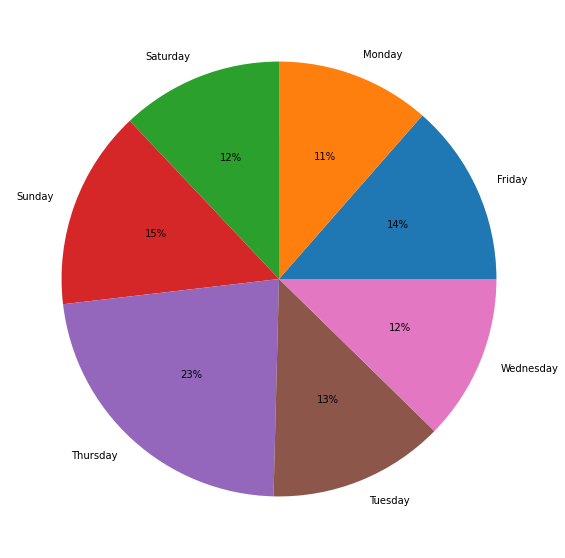

In [67]:
plt.figure(figsize=(10,10))
plt.pie(day_sales.values, labels=day_sales.index, autopct='%.0f%%')

In [68]:
data = df.groupby("CustID")['Order ID'].sum ().sort_values(ascending=False).head(20)

In [69]:
data = df.groupby("CustID")["Order ID"].nunique().sort_values(ascending = False).reset_index().head(11)

In [70]:
def group_Quantity_Revenue(df,string):
    df = df[[f'{string}','Quantity','Revenue']].groupby([f'{string}']).sum().sort_values(by= 'Revenue', ascending = False).reset_index()
    return df

In [71]:
top = group_Quantity_Revenue(df,'Sub-Category')
top

,Sub-Category,Quantity,Revenue
0,Printers,291,307963.0
1,Bookcases,297,295598.0
2,Saree,782,263523.0
3,Chairs,277,206479.0
4,Electronic Games,297,204850.0
5,Phones,304,200893.0
6,Trousers,135,124640.0
7,Accessories,262,102877.0
8,Tables,61,90706.0
9,Stole,671,86155.0


In [72]:
top.sort_values(ascending=False,by='Quantity')

,Sub-Category,Quantity,Revenue
2,Saree,782,263523.0
10,Hankerchief,754,75518.0
9,Stole,671,86155.0
11,Furnishings,310,72982.0
12,T-shirt,305,41396.0
5,Phones,304,200893.0
4,Electronic Games,297,204850.0
1,Bookcases,297,295598.0
0,Printers,291,307963.0
3,Chairs,277,206479.0


In [73]:
top.sort_values(ascending=False,by='Revenue')

,Sub-Category,Quantity,Revenue
0,Printers,291,307963.0
1,Bookcases,297,295598.0
2,Saree,782,263523.0
3,Chairs,277,206479.0
4,Electronic Games,297,204850.0
5,Phones,304,200893.0
6,Trousers,135,124640.0
7,Accessories,262,102877.0
8,Tables,61,90706.0
9,Stole,671,86155.0


In [187]:
top.to_csv("top_pro.csv")
from google.colab import files
files.download("top_pro.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Highest Revenue is obtained from printers.

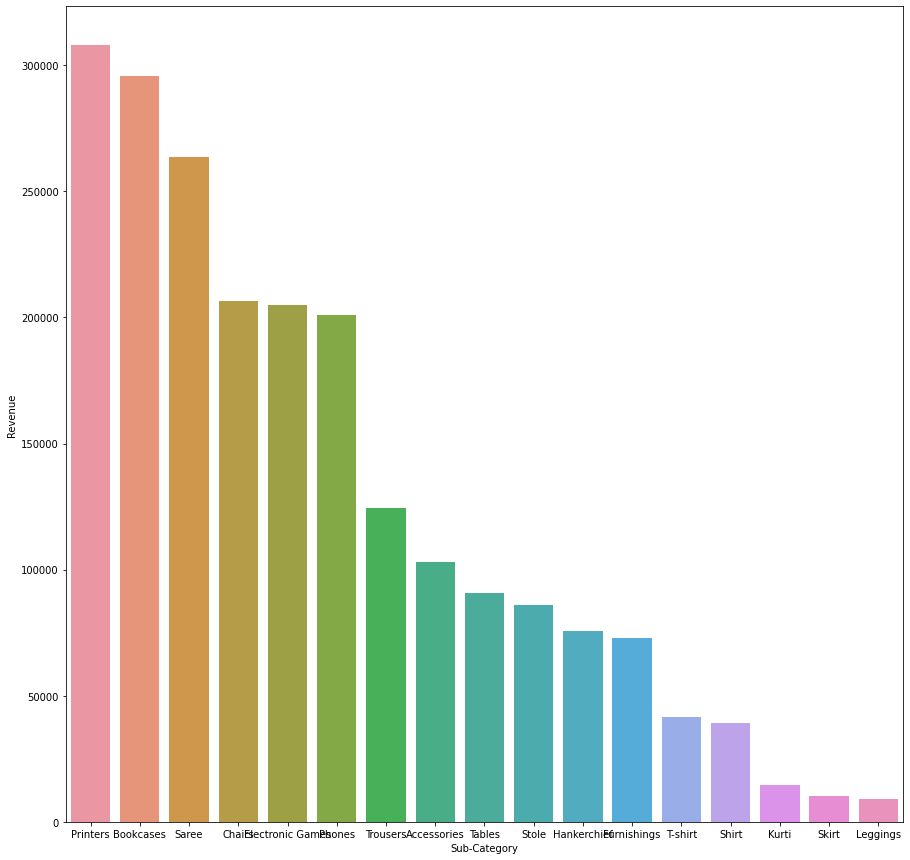

In [74]:
plt.figure(figsize=(15,15))
sns.barplot(data=top,x='Sub-Category',y='Revenue')

In [75]:
statelist=list(df['State'].unique())

In [76]:
def state_split(state="all",data=df):
  if state == "all":
    return data
  else:
    temp_df=data[data["State"]==state]
    temp_df.reset_index(drop=True,inplace=True)

    return temp_df

In [77]:
MP=state_split(state="Madhya Pradesh")

In [78]:
MP.head()

,index,Order ID,Order Date,State,City,CustID,Amount,Quantity,Category,Sub-Category,Revenue,Day,Month,Year,Week of the Year,Day of Week,ProductID
0,9,B-25603,2018-03-04,Madhya Pradesh,Bhopal,656,1355.0,5,Clothing,Trousers,6775.0,03,April,2018,9,Sunday,12
1,10,B-25603,2018-03-04,Madhya Pradesh,Bhopal,656,24.0,1,Furniture,Chairs,24.0,03,April,2018,9,Sunday,17
2,11,B-25603,2018-03-04,Madhya Pradesh,Bhopal,656,193.0,3,Clothing,Saree,579.0,03,April,2018,9,Sunday,19
3,12,B-25603,2018-03-04,Madhya Pradesh,Bhopal,656,180.0,3,Clothing,Trousers,540.0,03,April,2018,9,Sunday,12
4,13,B-25603,2018-03-04,Madhya Pradesh,Bhopal,656,116.0,4,Clothing,Stole,464.0,03,April,2018,9,Sunday,2


##APRIORI


In [79]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [80]:
cart = (MP.groupby(['Order ID', 'Sub-Category'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('Order ID'))
cart.head()

Sub-Category,Accessories,Bookcases,Chairs,Electronic Games,Furnishings,Hankerchief,Kurti,Leggings,Phones,Printers,Saree,Shirt,Skirt,Stole,T-shirt,Tables,Trousers
Order ID,,,,,,,,,,,,,,,,,
B-25603,0.0,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,3.0,0.0,0.0,10.0,0.0,0.0,8.0
B-25621,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
B-25627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
B-25637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
B-25639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
def encoder(x):
  if(x<=0):
    return 0
  if(x>=1):
    return 1

In [82]:
cart = cart.applymap(encoder)
cart.head()

Sub-Category,Accessories,Bookcases,Chairs,Electronic Games,Furnishings,Hankerchief,Kurti,Leggings,Phones,Printers,Saree,Shirt,Skirt,Stole,T-shirt,Tables,Trousers
Order ID,,,,,,,,,,,,,,,,,
B-25603,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
B-25621,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
B-25627,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
B-25637,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
B-25639,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [83]:
cart = cart[(cart>0).sum(axis=1)>=2]

In [84]:
cart.head()

Sub-Category,Accessories,Bookcases,Chairs,Electronic Games,Furnishings,Hankerchief,Kurti,Leggings,Phones,Printers,Saree,Shirt,Skirt,Stole,T-shirt,Tables,Trousers
Order ID,,,,,,,,,,,,,,,,,
B-25603,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1
B-25621,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
B-25645,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0
B-25651,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1,0,0
B-25655,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1


In [85]:
frequent_itemsets = apriori(cart, min_support=0.01, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.127273,(Accessories)
1,0.272727,(Bookcases)
2,0.363636,(Chairs)
3,0.236364,(Electronic Games)
4,0.218182,(Furnishings)


In [86]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Bookcases),(Accessories),0.272727,0.127273,0.036364,0.133333,1.047619,0.001653,1.006993
1,(Accessories),(Bookcases),0.127273,0.272727,0.036364,0.285714,1.047619,0.001653,1.018182
2,(Furnishings),(Accessories),0.218182,0.127273,0.036364,0.166667,1.309524,0.008595,1.047273
3,(Accessories),(Furnishings),0.127273,0.218182,0.036364,0.285714,1.309524,0.008595,1.094545
4,(Leggings),(Accessories),0.127273,0.127273,0.018182,0.142857,1.122449,0.001983,1.018182


In [87]:
rules = rules.sort_values("lift",ascending=False).reset_index(drop= True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Accessories, Hankerchief, Saree)","(Chairs, Tables, Bookcases)",0.018182,0.018182,0.018182,1.0,55.0,0.017851,inf
1,"(T-shirt, Printers, Saree, Shirt)","(Chairs, Phones, Bookcases)",0.018182,0.018182,0.018182,1.0,55.0,0.017851,inf
2,"(Printers, Stole, Hankerchief, Shirt)","(Leggings, Furnishings, Saree)",0.018182,0.018182,0.018182,1.0,55.0,0.017851,inf
3,"(Tables, Skirt)","(Chairs, Hankerchief, Furnishings, Saree)",0.018182,0.018182,0.018182,1.0,55.0,0.017851,inf
4,"(Chairs, Furnishings, T-shirt)","(Tables, Skirt)",0.018182,0.018182,0.018182,1.0,55.0,0.017851,inf


In [88]:
rules.describe()

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,antecedent support,consequent support,support,confidence,lift,leverage,conviction
count,23518.000000,23518.000000,23518.000000,23518.000000,23518.000000,23518.000000,2.351800e+04
mean,0.106650,0.106650,0.020939,0.480711,8.211540,0.014450,inf
std,0.121719,0.121719,0.010789,0.369677,9.731855,0.005445,NaN
min,0.018182,0.018182,0.018182,0.033333,1.015385,0.000331,1.001070e+00
25%,0.018182,0.018182,0.018182,0.142857,2.500000,0.011570,1.111111e+00
50%,0.054545,0.054545,0.018182,0.333333,4.583333,0.014876,1.418182e+00
75%,0.127273,0.127273,0.018182,1.000000,9.166667,0.016860,NaN
max,0.545455,0.545455,0.254545,1.000000,55.000000,0.064463,inf


In [89]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23518 entries, 0 to 23517
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         23518 non-null  object 
 1   consequents         23518 non-null  object 
 2   antecedent support  23518 non-null  float64
 3   consequent support  23518 non-null  float64
 4   support             23518 non-null  float64
 5   confidence          23518 non-null  float64
 6   lift                23518 non-null  float64
 7   leverage            23518 non-null  float64
 8   conviction          23518 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.6+ MB


In [90]:
data1 = rules.head(50).copy()

In [91]:
data1.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(Accessories, Hankerchief, Saree)","(Chairs, Tables, Bookcases)",0.018182,0.018182,0.018182,1.0,55.0,0.017851,inf
1,"(T-shirt, Printers, Saree, Shirt)","(Chairs, Phones, Bookcases)",0.018182,0.018182,0.018182,1.0,55.0,0.017851,inf
2,"(Printers, Stole, Hankerchief, Shirt)","(Leggings, Furnishings, Saree)",0.018182,0.018182,0.018182,1.0,55.0,0.017851,inf
3,"(Tables, Skirt)","(Chairs, Hankerchief, Furnishings, Saree)",0.018182,0.018182,0.018182,1.0,55.0,0.017851,inf
4,"(Chairs, Furnishings, T-shirt)","(Tables, Skirt)",0.018182,0.018182,0.018182,1.0,55.0,0.017851,inf


##Customer Segmentation

In [92]:
ref_date = df['Order Date'].max() + dt.timedelta(days=1) 

In [93]:
rfm = df.groupby('CustID').agg({'Order Date': lambda x: (ref_date - x.max()).days,
                                    'Order ID': lambda x: x.count(),
                                    'Revenue': lambda x: x.sum()})

In [94]:
rfm

,Order Date,Order ID,Revenue
CustID,,,
2,415,1,1251.0
3,324,8,6835.0
6,387,1,234.0
11,636,3,250.0
12,436,1,552.0
...,...,...,...
1491,375,1,216.0
1492,422,1,174.0
1495,591,1,1602.0


In [95]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [96]:
rfm.reset_index(inplace=True)

In [158]:
rfm['R_rank'] = rfm['Recency'].rank(ascending=False)
rfm['F_rank'] = rfm['Frequency'].rank(ascending=True)
rfm['M_rank'] = rfm['Monetary'].rank(ascending=True)

# normalizing the rank of the customers
rfm['R_rank_norm'] = (rfm['R_rank']/rfm['R_rank'].max())*100
rfm['F_rank_norm'] = (rfm['F_rank']/rfm['F_rank'].max())*100
rfm['M_rank_norm'] = (rfm['F_rank']/rfm['M_rank'].max())*100

rfm.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

rfm.head()


,index,CustID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Cluster,R_rank_norm,F_rank_norm,M_rank_norm
0,0,2,415,1,1251.0,2,1,2,5,0,47.4,23.623624,23.6
1,1,3,324,8,6835.0,3,4,4,11,1,67.5,93.993994,93.9
2,2,6,387,1,234.0,3,1,1,5,0,53.8,23.623624,23.6
3,3,11,636,3,250.0,1,3,1,5,0,6.3,58.958959,58.9
4,4,12,436,1,552.0,2,1,2,5,0,42.7,23.623624,23.6


In [160]:
rfm['RFM_Score'] = 0.15*rfm['R_rank_norm']+0.28 * rfm['F_rank_norm']+0.57*rfm['M_rank_norm']
rfm['RFM_Score'] *= 0.05
rfm = rfm.round(2)

In [163]:
rfm.head()

,index,CustID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Cluster,R_rank_norm,F_rank_norm,M_rank_norm,RFM_score
0,0,2,415,1,1251.0,2,1,2,1.36,0,47.4,23.62,23.6,5
1,1,3,324,8,6835.0,3,4,4,4.50,1,67.5,93.99,93.9,11
2,2,6,387,1,234.0,3,1,1,1.41,0,53.8,23.62,23.6,5
3,3,11,636,3,250.0,1,3,1,2.55,0,6.3,58.96,58.9,5
4,4,12,436,1,552.0,2,1,2,1.32,0,42.7,23.62,23.6,5


In [169]:
rfm["Customer_segment"] = np.where(rfm['RFM_Score'] >4.5, "Top Customers",
									(np.where(rfm['RFM_Score'] > 4,"High value Customer",
									(np.where(rfm['RFM_Score'] > 3,"Medium Value Customer",
							    (np.where(rfm['RFM_Score'] > 1.6,'Low Value Customers', 'Lost Customers')))))))

In [173]:
seg = rfm['Customer_segment'].value_counts()

([<matplotlib.patches.Wedge at 0x7f5653257fd0>,
 [Text(0.4049370232742902, 1.0227541284110062, 'Lost Customers'),
  Text(-1.0996526093918182, -0.027643058039321256, 'Medium Value Customer'),
  Text(-0.06906960848527934, -1.0978293989430645, 'Low Value Customers'),
  Text(0.9174862685660611, -0.6068104704046609, 'High value Customer'),
  Text(1.0921708624632533, -0.131006897475948, 'Top Customers')],
 [Text(0.22087473996779464, 0.5578658882241851, '38%'),
  Text(-0.599810514213719, -0.015078031657811592, '25%'),
  Text(-0.037674331901061446, -0.598816035787126, '22%'),
  Text(0.5004470555814878, -0.33098752931163317, '11%'),
  Text(0.5957295613435927, -0.07145830771415343, '4%')])

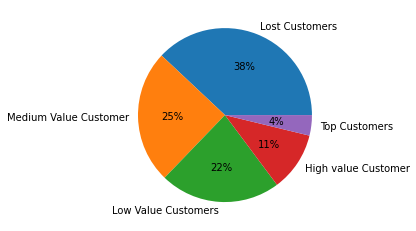

In [174]:
plt.pie(seg.values,labels=seg.index,autopct='%.0f%%')

In [170]:
rfm.head()

,index,CustID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Cluster,R_rank_norm,F_rank_norm,M_rank_norm,RFM_score,Customer_segment
0,0,2,415,1,1251.0,2,1,2,1.36,0,47.4,23.62,23.6,5,Lost Customers
1,1,3,324,8,6835.0,3,4,4,4.50,1,67.5,93.99,93.9,11,High value Customer
2,2,6,387,1,234.0,3,1,1,1.41,0,53.8,23.62,23.6,5,Lost Customers
3,3,11,636,3,250.0,1,3,1,2.55,0,6.3,58.96,58.9,5,Low Value Customers
4,4,12,436,1,552.0,2,1,2,1.32,0,42.7,23.62,23.6,5,Lost Customers


In [162]:
rfm["R"] = pd.qcut(rfm['Recency'].rank(method="first"), 4, labels=[4, 3, 2, 1])
rfm["F"] = pd.qcut(rfm['Frequency'].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm["M"] = pd.qcut(rfm['Monetary'].rank(method="first"), 4, labels=[1, 2, 3, 4])
rfm['RFM_score'] = (rfm['R'].astype(int)+rfm['F'].astype(int)+rfm['M'].astype(int))

rfm.reset_index(inplace=True)
rfm.head(10)

In [98]:
rfm.columns

Index(['index', 'CustID', 'Recency', 'Frequency', 'Monetary', 'R', 'F', 'M',
       'RFM_Score'],
      dtype='object')

In [99]:
rfm.head()

,index,CustID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,0,2,415,1,1251.0,2,1,2,5
1,1,3,324,8,6835.0,3,4,4,11
2,2,6,387,1,234.0,3,1,1,5
3,3,11,636,3,250.0,1,3,1,5
4,4,12,436,1,552.0,2,1,2,5


In [100]:
rfm[["RFM_Score", "Recency", "Frequency", "Monetary"]].groupby("RFM_Score").agg(["mean", "count"])

Recency       Frequency            Monetary      
                 mean count      mean count          mean count
RFM_Score                                                      
3          614.750000    12  1.000000    12    121.333333    12
4          559.500000    34  1.000000    34    297.617647    34
5          475.845070    71  1.098592    71    829.323944    71
6          412.435484    62  1.500000    62   1169.225806    62
7          394.829268    82  1.841463    82   1852.548780    82
8          394.901639    61  2.704918    61   2660.245902    61
9          425.716667    60  4.616667    60   6379.083333    60
10         372.076923    65  5.323077    65   8560.661538    65
11         277.216216    37  6.000000    37  12433.027027    37
12         193.062500    16  7.625000    16  18157.937500    16

####KMeans Clustering

In [101]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

In [102]:
sc=StandardScaler()

In [103]:
x = rfm[['Recency','Frequency','Monetary','RFM_Score']]
x = sc.fit_transform(x)
x = pd.DataFrame(x)
x.columns = ['Recency','Frequency','Monetary','RFM_Score']

In [104]:
x.head()

,Recency,Frequency,Monetary,RFM_Score
0,0.029526,-0.807661,-0.392729,-1.096956
1,-0.579750,2.019152,0.328003,1.535738
2,-0.157943,-0.807661,-0.523995,-1.096956
3,1.509199,0.000000,-0.521929,-1.096956
4,0.170129,-0.807661,-0.482950,-1.096956


In [105]:
scores=[]
K=range(2,10)
for k in K:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(x)
  scores.append(kmeans.inertia_)

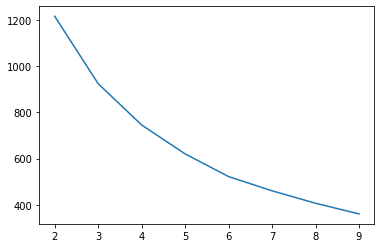

In [106]:
plt.plot(K,scores)
plt.show()

The elbow of our graph seems to be at 6.

In [107]:
for k in K:
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(x)
  sil=metrics.silhouette_score(x,kmeans.labels_)
  print("For {} clusters. the silhouette score is {}".format(k,sil))

For 2 clusters. the silhouette score is 0.39785751961719085
For 3 clusters. the silhouette score is 0.33760848434244944
For 4 clusters. the silhouette score is 0.3504862736849102
For 5 clusters. the silhouette score is 0.33335347321698694
For 6 clusters. the silhouette score is 0.34445677196522534
For 7 clusters. the silhouette score is 0.3415364080270866
For 8 clusters. the silhouette score is 0.34338106403008467
For 9 clusters. the silhouette score is 0.32949217900916394


Let us choose 4 clusters.

In [188]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(x)

KMeans(n_clusters=5)

In [189]:
rfm['Cluster']=kmeans.labels_
rfm.head()

,index,CustID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Cluster,R_rank_norm,F_rank_norm,M_rank_norm,RFM_score,Customer_segment
0,0,2,415,1,1251.0,2,1,2,1.36,0,47.4,23.62,23.6,5,Lost Customers
1,1,3,324,8,6835.0,3,4,4,4.50,4,67.5,93.99,93.9,11,High value Customer
2,2,6,387,1,234.0,3,1,1,1.41,0,53.8,23.62,23.6,5,Lost Customers
3,3,11,636,3,250.0,1,3,1,2.55,2,6.3,58.96,58.9,5,Low Value Customers
4,4,12,436,1,552.0,2,1,2,1.32,2,42.7,23.62,23.6,5,Lost Customers


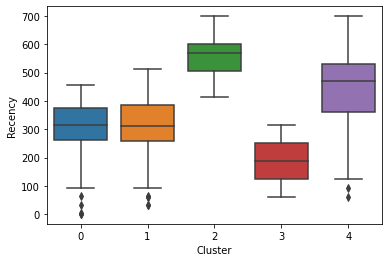

In [190]:
sns.boxplot( x= 'Cluster',y= 'Recency' ,data=rfm)

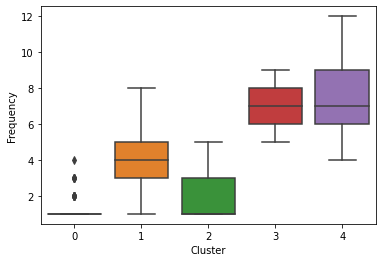

In [191]:
sns.boxplot( x= 'Cluster',y= 'Frequency' ,data=rfm)

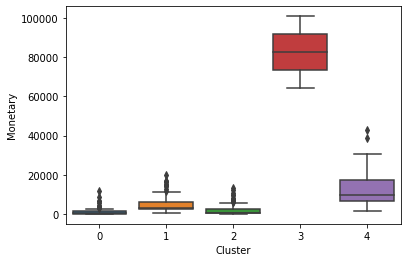

In [193]:
sns.boxplot( x= 'Cluster',y= 'Monetary' ,data=rfm)

In [194]:
temp_df = rfm[["Cluster","RFM_Score", "Recency", "Frequency", "Monetary"]].groupby("Cluster").agg(["mean"])
temp_df.columns = ["RFM_Score mean", "Recency mean", "Frequency mean", "Monetary mean"]
temp_df

,RFM_Score mean,Recency mean,Frequency mean,Monetary mean
Cluster,,,,
0,1.730596,309.013245,1.218543,1042.205298
1,3.471802,314.468468,4.027027,4934.351351
2,1.721962,563.734177,1.784810,1793.044304
3,4.410000,188.000000,7.000000,82586.500000
4,4.168590,439.512821,7.346154,12734.743590


In [114]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [195]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2,
                    subplot_titles=("RFM_Score", "Recency", "Frequency","Monetary"),
                    specs=specs)

fig.add_trace(
    go.Pie(values = temp_df['RFM_Score mean'], labels = temp_df.index,
    name = 'RFM_Score'),
    1, 1
)
fig.add_trace(
    go.Pie(values = temp_df['Recency mean'], labels = temp_df.index,
    name = 'Recency'),
    1, 2
)
fig.add_trace(
    go.Pie(values = temp_df['Frequency mean'], labels = temp_df.index,
    name = 'Frequency'),
    2, 1
)
fig.add_trace(
    go.Pie(values = temp_df['Monetary mean'], labels = temp_df.index,
    name = 'Monetary'),
    2, 2
)
fig.update_layout(height=800, width=1200, title_text=" ")
fig.show()


In [196]:
rfm.to_csv('rfm_data.csv')
files.download("rfm_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Product Recommendation.

In [116]:
from numpy.lib.arraysetops import unique

In [117]:
catalog=list(unique(df['Sub-Category']))

In [118]:
catalog

['Accessories',
 'Bookcases',
 'Chairs',
 'Electronic Games',
 'Furnishings',
 'Hankerchief',
 'Kurti',
 'Leggings',
 'Phones',
 'Printers',
 'Saree',
 'Shirt',
 'Skirt',
 'Stole',
 'T-shirt',
 'Tables',
 'Trousers']

In [119]:
def remove_from_list(y, item_to_search):
  newlist = list()
  for i in y:
    if i not in item_to_search:
      newlist.append(i)
  return newlist

In [120]:
def search_list(item_to_search, list_to_search = rules['antecedents']):
  print(item_to_search)
  max_lift = 0
  item_to_recommend = ''
  for i, item in enumerate(list_to_search):
    if set(list(item_to_search)).issubset(set(list(item))):
      if rules['lift'][i] > max_lift:
        max_lift = rules['lift'][i]
        y = list(rules['antecedents'][i])
        x = remove_from_list(y, item_to_search)
        item_to_recommend = list(rules['consequents'][i]) + x
  if item_to_recommend == '':
    print("There are no Product recommendations")
  else:
    return print(f"People who bought this also bought: {item_to_recommend}")

In [121]:
for i in range(len(catalog)):
  search_list([catalog[i]])

['Accessories']
People who bought this also bought: ['Chairs', 'Tables', 'Bookcases', 'Hankerchief', 'Saree']
['Bookcases']
People who bought this also bought: ['Skirt', 'T-shirt', 'Shirt', 'Leggings', 'Saree']
['Chairs']
People who bought this also bought: ['Tables', 'Skirt', 'Furnishings', 'T-shirt']
['Electronic Games']
People who bought this also bought: ['Chairs', 'Printers', 'Trousers', 'Stole', 'Shirt']
['Furnishings']
People who bought this also bought: ['Tables', 'Skirt', 'Chairs', 'T-shirt']
['Hankerchief']
People who bought this also bought: ['Chairs', 'Tables', 'Bookcases', 'Accessories', 'Saree']
['Kurti']
People who bought this also bought: ['Phones', 'Stole', 'Hankerchief', 'Electronic Games']
['Leggings']
People who bought this also bought: ['Phones', 'Furnishings', 'Hankerchief', 'Accessories']
['Phones']
People who bought this also bought: ['Accessories', 'Furnishings', 'Hankerchief', 'Leggings']
['Printers']
People who bought this also bought: ['Chairs', 'Phones', 'B

###Festive Sales

In [122]:
import holidays

In [123]:
indian=holidays.India()

In [124]:
for i in holidays.India(years=2018).items():
  print(i)


(datetime.date(2018, 1, 14), 'Makar Sankranti / Pongal')
(datetime.date(2018, 1, 26), 'Republic Day')
(datetime.date(2018, 8, 15), 'Independence Day')
(datetime.date(2018, 10, 2), 'Gandhi Jayanti')
(datetime.date(2018, 5, 1), 'Labour Day')
(datetime.date(2018, 12, 25), 'Christmas')
(datetime.date(2018, 11, 7), 'Diwali')
(datetime.date(2018, 3, 2), 'Holi')


In [125]:
holiday=[]
for i in holidays.India(years=2018).keys():
     holiday.append(i)

In [126]:
for i in holidays.India(years=2019).keys():
     holiday.append(i)

In [127]:
w=[]
for i in df['Order Date']:
    if i in holiday:
        w.append("Holiday")
    else:
        w.append("Working")


In [128]:
df['Holiday']=w

In [129]:
df.head()

,index,Order ID,Order Date,State,City,CustID,Amount,Quantity,Category,Sub-Category,Revenue,Day,Month,Year,Week of the Year,Day of Week,ProductID,Holiday
0,0,B-25601,2018-01-04,Gujarat,Ahmedabad,932,1275.0,7,Furniture,Bookcases,8925.0,01,April,2018,1,Thursday,16,Working
1,1,B-25601,2018-01-04,Gujarat,Ahmedabad,932,66.0,5,Clothing,Stole,330.0,01,April,2018,1,Thursday,2,Working
2,2,B-25601,2018-01-04,Gujarat,Ahmedabad,932,8.0,3,Clothing,Hankerchief,24.0,01,April,2018,1,Thursday,11,Working
3,3,B-25601,2018-01-04,Gujarat,Ahmedabad,932,80.0,4,Electronics,Electronic Games,320.0,01,April,2018,1,Thursday,10,Working
4,4,B-25602,2018-01-04,Maharashtra,Pune,166,168.0,2,Electronics,Phones,336.0,01,April,2018,1,Thursday,5,Working


In [130]:
df['Holiday'].value_counts()

Working    1458
Holiday      42
Name: Holiday, dtype: int64

In [131]:
h=df[df['Holiday']=='Holiday']

In [132]:
hh=h.groupby('Sub-Category')['Quantity'].nunique()

In [133]:
hh

Sub-Category
Accessories         4
Bookcases           3
Electronic Games    3
Furnishings         2
Hankerchief         2
Leggings            2
Phones              1
Printers            3
Saree               4
Shirt               3
Stole               4
T-shirt             3
Name: Quantity, dtype: int64

In [134]:
df3=pd.read_csv("/content/Sales target.csv")

In [135]:
df3.sort_values(by=['Category','Month of Order Date']).reset_index()

,index,Month of Order Date,Category,Target
0,12,Apr-18,Clothing,12000.0
1,16,Aug-18,Clothing,14000.0
2,20,Dec-18,Clothing,16000.0
3,22,Feb-19,Clothing,16000.0
4,21,Jan-19,Clothing,16000.0
5,15,Jul-18,Clothing,14000.0
6,14,Jun-18,Clothing,12000.0
7,23,Mar-19,Clothing,16000.0
8,13,May-18,Clothing,12000.0
9,19,Nov-18,Clothing,16000.0


In [136]:
df4=df[['Month','Year','Category','Revenue','Quantity']]

In [137]:
df4.head()

,Month,Year,Category,Revenue,Quantity
0,April,2018,Furniture,8925.0,7
1,April,2018,Clothing,330.0,5
2,April,2018,Clothing,24.0,3
3,April,2018,Electronics,320.0,4
4,April,2018,Electronics,336.0,2


In [138]:
df4['Month_year']=df4['Month']+df4['Year']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [139]:
df4.drop(['Month','Year'],axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
df5 = df4.groupby(['Month_year','Category'])['Revenue'].sum().reset_index().sort_values(by=['Category','Month_year'])

In [141]:
df5.reset_index()

,index,Month_year,Category,Revenue
0,0,April2018,Clothing,67649.0
1,3,August2018,Clothing,59474.0
2,6,December2018,Clothing,43306.0
3,9,February2019,Clothing,49332.0
4,12,January2019,Clothing,66935.0
5,15,July2018,Clothing,13060.0
6,18,June2018,Clothing,40292.0
7,21,March2019,Clothing,92718.0
8,24,May2018,Clothing,44338.0
9,27,November2018,Clothing,72687.0


In [142]:
diff=df5['Revenue'] -df3['Target']

In [143]:
df5['Difference']=diff

In [144]:
df6=df5[['Month_year','Difference','Category']]

In [145]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month_year  36 non-null     object 
 1   Difference  36 non-null     float64
 2   Category    36 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.2+ KB


In [197]:
df6.to_csv('tar_data.csv')
files.download("tar_data.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

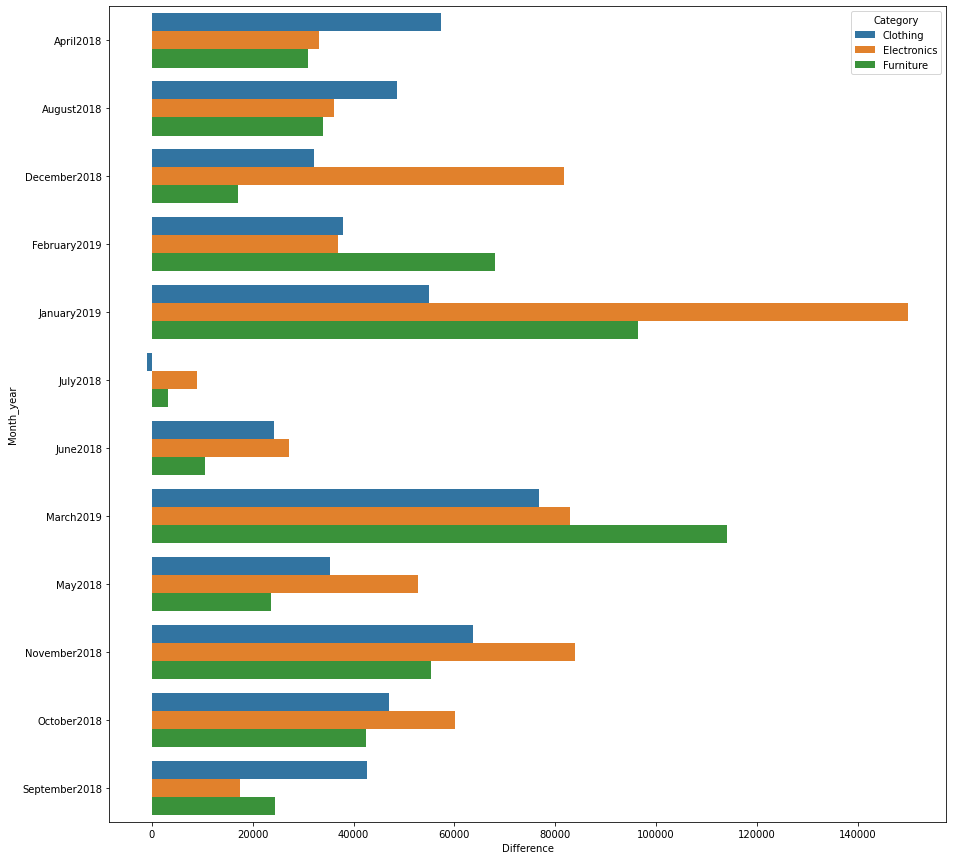

In [154]:
plt.figure(figsize=(15,15))
sns.barplot(data=df6,y='Month_year',x='Difference',hue='Category')

The electronic goods' sale provided around 15k more than the expected target in the month of January 2019. There is only one case where the sales has not met the target which is july 2018 clothing sales.

##Dashboard

In [156]:
pip install dash pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.9 MB 3.3 MB/s 


In [157]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

